# Lab 1 - kNN and Bias-Variance Tradeoff

- Your name: Nguyễn Minh Quang

- Your student code: 22133045

# I. Hướng dẫn

## 1. Minh họa bias-variance tradeoff với k-NN cho hồi quy

### 1.1. Tìm hiểu tổng quan về dữ liệu

Phần này sẽ dùng tập dữ liệu `boston` để minh họa. Tập dữ liệu này có một số thông tin sau:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

- Number of Instances: 506 

- Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

- Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per \$10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

- Missing Attribute Values: None

- Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

- Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
- Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

#### 1.1.1. Load dữ liệu

In [18]:
!pip install pandas

In [19]:
import pandas as pd

boston = pd.read_csv("./Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### 1.1.2. Chuẩn bị dữ liệu

In [20]:
y = boston["medv"]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [21]:
inputCols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']
X = boston[inputCols]
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### 1.2. Chia dữ liệu

Ta sẽ chia dữ liệu làm 2 tập train và test với tỷ lệ 70/30.

In [22]:
!pip install scikit-learn

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 506
Labels counts in y_train: 354
Labels counts in y_test: 152


### 1.3. Fit mô hình và trực quan hóa kết quả

Phần này ta sẽ đánh giá và vẽ biểu đồ kết quả của mô hình k-NN trên tập test với $k \in \{ 1, 5, 10, 15, 20, 25, 30 \}$ dùng độ đo `mean squared error (MSE)`.

In [24]:
!pip install matplotlib

Text(0, 0.5, 'MSE')

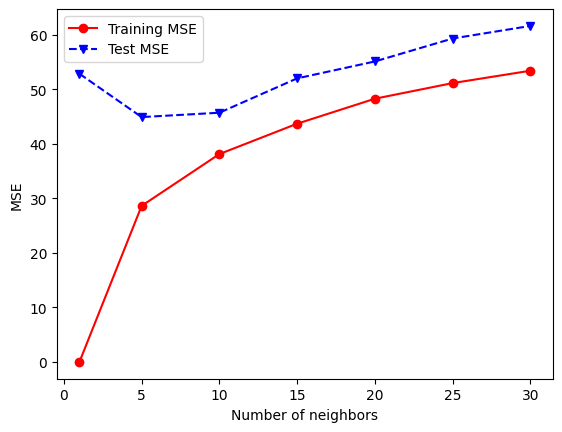

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainMSE = []
testMSE = []

for k in numNeighbors:
    reg = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    reg.fit(X_train, y_train)
    y_predTrain = reg.predict(X_train)
    y_predTest = reg.predict(X_test)
    trainMSE.append(mean_squared_error(y_train, y_predTrain))
    testMSE.append(mean_squared_error(y_test, y_predTest))

plt.plot(numNeighbors, trainMSE, 'ro-', numNeighbors, testMSE,'bv--')
plt.legend(['Training MSE','Test MSE'])
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')

**Nhận xét**

- Khi $k = 1$ mô hình cho kết quả (MSE) trên tập train rất tốt nhưng kết quả trên tập test khá cao. Mô hình có dấu hiệu overfitting.

- Khi tăng $k$ lên ($k \in \{5, 10 \}$) kết quả trên tập train tăng lên nhưng kết quả trên tập test lại giảm xuống (so với $k = 1$). Do đó, miền giá trị $k \in [5, 10]$ có khả năng là miền giá trị mà mô hình cho kết quả tốt (good fit). 

- Khi tăng $k$ lên nữa ($k \in \{15, 20, 25, 30\}$) kết quả trên tập train tăng lên và kết quả trên tập test có khuynh hướng tăng lên. Do đó, miền giá trị $k \in [15, 30]$ nhiều khả năng là miền giá trị mà mô hình bị underfitting.

# II. Bài tập

## Bài tập 1. Áp dụng thuật toán k-NN

Cho dữ liệu huấn luyện (training data) như bảng bên dưới:

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
|   1   |  0.5  |  1  |
|   2   |   1   |  1  |
|  2.5  |   2   |  1  |
|   3   |   2   |  1  |
|  1.5  |   2   | -1  |
|  2.5  |   3   | -1  |
|   1   |   2   | -1  |
|   1   |   1   | -1  |

Ta muốn sử dụng tập dữ liệu huấn luyện ở trên để đưa ra dự đoán, $\hat{y}$, cho điểm dữ liệu kiểm tra không được gắn nhãn $x = (2.5, 1)$ sử dụng thuật toán k-NN.

1. Tính khoảng cách Eucledian giữa mỗi quan sát và điểm kiểm tra, $x = (2.5, 1)$ (tạo thêm cột $d$  mô tả khoảng cách giữa các điểm dữ liệu trong tập huấn luyện với điểm kiểm tra, $x = (2.5, 1)$, và điền giá trị vào cột này). Xuất kết quả ra như bảng bên dưới (giá trị cột $d$ là khoảng cách tính được).

Tham khảo thêm về thư viện `numpy` ở: https://cs231n.github.io/python-numpy-tutorial/

**Trả lời**

1.a. Định nghĩa hàm tính khoảng cách Eucledian theo công thức sau:

$$d(u, v) = \sqrt{\sum_{i = 1}^{n} (u_i - v_i)^2}$$

In [26]:

import math
def EuclideanDistance(u, v):
    '''
        Calculate the Eucledian distance of vector u and v
    '''
    ## BEGIN YOUR CODE
    s = 0.0
    for index, value in enumerate(u):
        s += (u[index] - v[index])**2 
    ## END YOUR CODE
    return math.sqrt(s)
u = (1, 2, 3)
v = (4, 2, 7)
print("EuclideanDistance(u, v) = ", EuclideanDistance(u, v))

EuclideanDistance(u, v) =  5.0


1.b. Tính khoảng cách Eucledian giữa mỗi quan sát và điểm kiểm tra, 𝑥=(2.5,1)

In [27]:
import numpy as np

x = np.array([2.5, 1])

X = np.array([[1, 0.5],
              [2, 1],
              [2.5, 2],
              [3, 2],
              [1.5, 2],
              [2.5, 3],
              [1, 2],
              [1, 1]])

y = np.array(['1','1','1','1','-1','-1','-1','-1'])

for point in X:
    print("EuclideanDistance(x, (x1, y1)) = ", EuclideanDistance(x, point), " label: ", y[np.where((X == point).all(axis=1))][0])


EuclideanDistance(x, (x1, y1)) =  1.5811388300841898  label:  1
EuclideanDistance(x, (x1, y1)) =  0.5  label:  1
EuclideanDistance(x, (x1, y1)) =  1.0  label:  1
EuclideanDistance(x, (x1, y1)) =  1.118033988749895  label:  1
EuclideanDistance(x, (x1, y1)) =  1.4142135623730951  label:  -1
EuclideanDistance(x, (x1, y1)) =  2.0  label:  -1
EuclideanDistance(x, (x1, y1)) =  1.8027756377319946  label:  -1
EuclideanDistance(x, (x1, y1)) =  1.5  label:  -1


| $x_1$ | $x_2$ | $y$ | $d$ |
|-------|-------|-----|-----|
|   1   |  0.5  |  1  |  1.5811388300841898   |
|   2   |   1   |  1  |   0.5  |
|  2.5  |   2   |  1  |  1.0   |
|   3   |   2   |  1  |  1.118033988749895   |
|  1.5  |   2   | -1  |  1.4142135623730951   |
|  2.5  |   3   | -1  |    2.0  |
|   1   |   2   | -1  |  1.8027756377319946     |
|   1   |   1   | -1  |    1.5  |

2. Cho biết dự đoán của thuật toán $k$-NN cho $x = (2.5, 1)$ khi $k = 1$? Tại sao?

**Trả lời**

Nó sẽ là điểm (2, 1) với nhãn là 1 vì nó có khoảng cách gần nhất với điểm (2.5, 1) và cũng bởi k = 1 nên ta chỉ lấy 1 điểm gần nhất.

3. Cho biết dự đoán của thuật toán $k$-NN cho $x = (2.5, 1)$ khi $k = 3$? Tại sao?

**Trả lời**

Bởi vì 3 điểm gần nhất với (2.5, 1) là (2, 1), (2.5, 2) và (3, 2) đều có nhãn là 1 nên điểm (2.5, 1) sẽ được phân loại là 1.

## Bài tập 2: Hiện thực thuật toán k-NN

Ở bài tập này, bạn sẽ tự hiện thực thuật toán 1-NN (k = 1). Sau đó, bạn sẽ thử nghiệm thuật toán với tập dữ liệu `iris` từ thư viện `sklearn.datasets`. Phần bên dưới là các đoạn mã làm mẫu có một số chỗ còn chừa trống để bạn viết thêm vào.

### 2.1. Load và khám phá tổng quan về dữ liệu

In [28]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### 2.2. Xáo trộn ngẫu nhiên và chia dữ liệu

In [29]:
# Shuffle the data
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, y = X[shuffle], y[shuffle]

# Split data into train and test set
train_data, train_labels = X[:100], y[:100]
test_data, test_labels = X[100:], y[100:]

### 2.3. Định nghĩa lớp NearestNeighborClassifier

Để đơn giản, bạn chỉ cần cài đặt thuật toán k-NN cho bài toán phân loại với k = 1. 

In [30]:
class NearestNeighborClassifier:
    # Constructor
    def __init__(self, metric = EuclideanDistance):
        self.metric = metric
    
    # No training for Nearest Neighbors, just store the data
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test instance and return results
    def predict(self, test_data):
        results = []
        for instance in test_data:
            results.append(self._predict_instance(instance))
        return results
    
    # Private function for making a single prediction
    def _predict_instance(self, instance):
        ## BEGIN YOUR CODE
        # Tính khoảng cách từ instance đến tất cả điểm train
        distances = []
        for train_point in self.train_data:
            distances.append(self.metric(instance, train_point))

        # Tìm điểm train gần nhất
        min_distance_index = np.argmin(distances)

        label_predicted = self.train_labels[min_distance_index]

        # Trả về nhãn của điểm train gần nhất
        return label_predicted
        ## END YOUR CODE

### 2.4. Thử nghiệm NearestNeighborClassifier

In [31]:
nn = NearestNeighborClassifier()
nn.fit(train_data, train_labels)
preds = nn.predict(test_data)

total = len(preds)
correct = 0
for pred, label in zip(preds, test_labels):
    if pred == label: correct += 1

print("total: %d, correct: %d, accuracy: %3.2f" %(total, correct, 1.0*correct/total))

total: 50, correct: 48, accuracy: 0.96


## Bài tập 3. Minh họa bias-variance tradeoff với k-NN cho phân loại

### 3.1. Chia dữ liệu
Ta sẽ tiếp tục dùng tập dữ liệu `iris` từ thư viện `sklearn.datasets` cho các yêu cầu bên dưới.

Chia dữ liệu thành 2 tập train và test với tỷ lệ 80/20. Sử dụng thêm tham số `stratify` để đảm bảo phân bố lớp (giá trị của thuộc tính $y$) trên tập train và tập test là xấp xỉ bằng nhau. In ra số lượng phần tử của tập train và tập test.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [32]:
# WRITE YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### 3.2 Chuẩn hóa dữ liệu

Sử dụng lớp `StandardScaler` của thư viện `sklearn.preprocessing` để chuẩn hóa dữ liệu trên tập train và tập test.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [33]:
# WRITE YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



### 3.3. Fit mô hình và trực quan hóa kết quả

Đánh giá và vẽ biểu đồ kết quả của mô hình k-NN trên tập test với $k \in \{ 1, 5, 10, 15, 20, 25, 30 \}$ dùng độ đo `Accuracy`.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Text(0, 0.5, 'Accuracy')

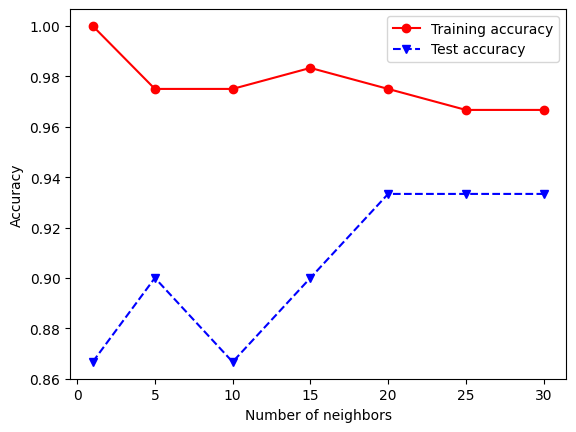

In [34]:
# WRITE YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
list_of_k = [1,5,10,15,20,25,30]
train_acc = []
test_acc = []

for k in list_of_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

import matplotlib.pyplot as plt
plt.plot(list_of_k, train_acc, 'ro-', list_of_k, test_acc,'bv--')
plt.legend(['Training accuracy','Test accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')


**Nhận xét**

- Khi k nhỏ (1,5) Training accuracy gần như đạt 1.0 → mô hình học thuộc dữ liệu train, dễ overfitting.

- Khi k trung bình (10,15) Training accuracy và Testing accuracy đều cao → mô hình tốt. Đây là vùng cân bằng giữa bias và variance.

- Khi k lớn (20,25,30) Training accuracy và Testing accuracy đều giảm → mô hình bị underfitting.


## Bài tập 4. Chẩn đoán bias-variance dùng learning curves

### 4.1. Vẽ learning curves
Sử dụng tập train và test của tập dữ liệu `iris` ở bước 2.2 của bài tập 2, hãy vẽ learning curves cho mô hình k-NN (k = 5).

Tham khảo: https://scikit-learn.org/stable/modules/learning_curve.html

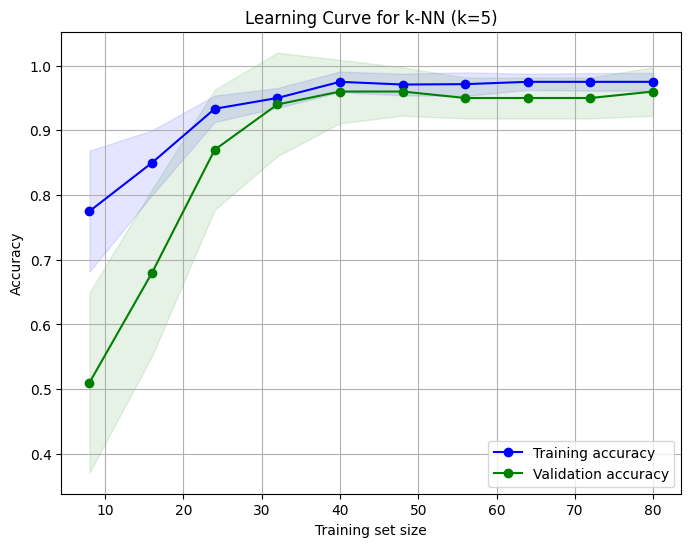

In [35]:
# WRITE YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

# Dùng train_data và train_labels từ bước 2.2
knn = KNeighborsClassifier(n_neighbors=5)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=train_data,
    y=train_labels,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Trung bình và độ lệch chuẩn
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title("Learning Curve for k-NN (k=5)")
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

### 4.2. Chuẩn đoán bias-variance dùng learning curves

Dựa vào learning curves vẽ được ở câu 4.1, hãy chuẩn đoán xem mô hình có đang bị bias hay variance hay cả hai? Giải thích?

**Trả lời**

Dựa vào learning curve, khi tập huấn luyện còn nhỏ mô hình có xu hướng high variance (đường training accuracy cao hơn validation accuracy khá nhiều). Tuy nhiên, khi kích thước tập train tăng, cả training accuracy và validation accuracy đều đạt mức cao (~0.95) và khoảng cách giữa hai đường nhỏ. Điều này cho thấy mô hình k-NN với k=5 đạt sự cân bằng giữa bias và variance, không bị underfitting hay overfitting.
